In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
import time
from sklearn.preprocessing import PolynomialFeatures

In [57]:
def load_data(): 
    data_set = datasets.load_breast_cancer()
    X=data_set.data
    y=data_set.target
    return X,y

In [58]:
def svm_models(X_train, X_test, y_train, y_test,models):
    acc = []
    models = list(models)
    for i in range(len(models)):
        clf = models[i]
        clf.fit(X_train, y_train)
        acc.append(clf.score(X_train, y_train))
    kernel = ['linear','rbf','poly']
    plt.bar(kernel, acc, align='center', alpha=0.5) 
    plt.xticks(kernel)
    plt.xlabel('Kernels')
    plt.ylabel('Accuracy')
    plt.title('svm_models')
    plt.show()


In [64]:
def ploy_kernel_var_deg(X_train, X_test, y_train, y_test):
    degrees = []
    times = []
    for i in range(1,4):
        clf = svm.SVC(kernel='poly', degree=i, gamma='auto', C= 0.1)
        clf.fit(X_train, y_train)
        times.append(time.time())
        degrees.append(i)
    degrees=np.array(degrees)
    plt.bar(degrees, times, align='center', alpha=0.5)
    plt.xticks(degrees)
    plt.xlabel('Degree of Polynomial')
    plt.ylabel('Time Taken')
    plt.title('Time taken by different degree polynomial')
    plt.show()


In [65]:
def custom_kernel(k,theta):
    def my_kernel(X, Y):
        retval = (k*(np.dot(X,Y.T))+ theta)
        return retval
    return my_kernel

In [66]:
def svm_custom_kernel(X_train, X_test, y_train, y_test, model):
    clf = model.fit(X_train, y_train)
    test_acc = clf.score(X_test, y_test)
    print(test_acc)

In [67]:
def main():
    X,y=load_data()
    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109) # 70% training and 30% test
  
    C=1
    models = (svm.SVC(kernel='linear', C=C),
            svm.SVC(kernel='rbf', gamma='auto', C=C),
            svm.SVC(kernel='poly', degree=2, gamma='auto', C=C))

    svm_models(X_train, X_test, y_train, y_test,models)
    ploy_kernel_var_deg(X_train, X_test, y_train, y_test)

    k=0.1
    theta=0.1

    model=svm.SVC(kernel=custom_kernel(k,theta))
    svm_custom_kernel(X_train, X_test, y_train, y_test, model)

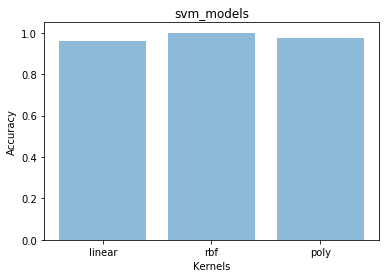

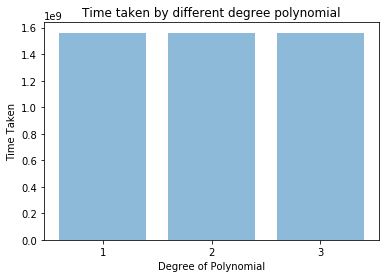

0.9707602339181286


In [68]:
if __name__=='__main__':
    main()
